In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit, logit, comb
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import os

In [2]:
data_dir = '/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/'
tiklova_mrna_event = pd.read_csv(data_dir + 'tiklova_neurogenesis/mrna_per_event.tab', sep='\t', index_col=0)
tiklova_rd = pd.read_csv(data_dir + 'tiklova_neurogenesis/rd_pc2.tab', sep='\t', index_col=0)
tiklova_PSI = pd.read_csv(data_dir + 'tiklova_neurogenesis/skipped_exons_psi.tab', sep='\t', index_col=0)
tiklova_psix = pd.read_csv('tiklova_neurogenesis.scores.txt', sep='\t', index_col=0)
tiklova_pseudotime = pd.read_csv('~/data_sc_regulation/tiklova/pseudotime.tab', sep='\t', index_col=0)

In [3]:
random_df = pd.DataFrame()
for mean_var in os.listdir('tiklova_neurogenesis_pvals'):
    with open('tiklova_neurogenesis_pvals/' + mean_var) as fh:
        random_scores = [np.float(x.rstrip()) for x in fh.readlines()]
    mean_var = mean_var.split('.')[0]
    random_df[mean_var] = random_scores
    

100%|██████████| 1988/1988 [00:11<00:00, 169.30it/s]


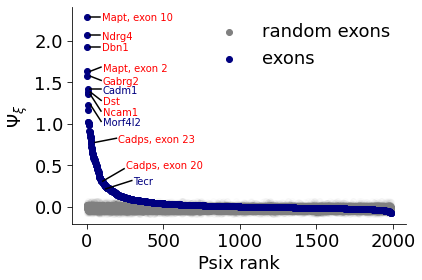

In [8]:
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(tiklova_psix.sort_values('L_score')[::-1].bin):
    subset = np.random.choice(random_df[mean_var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, tiklova_psix.loc['Mapt_1'].L_score-0.05, 'Mapt, exon 10', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Mapt_1'].L_score, tiklova_psix.loc['Mapt_1'].L_score],c='black')

plt.text(100, tiklova_psix.loc['Ndrg4_1'].L_score-0.05, 'Ndrg4', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Ndrg4_1'].L_score, tiklova_psix.loc['Ndrg4_1'].L_score],c='black')

plt.text(100, tiklova_psix.loc['Dbn1_1'].L_score-0.05, 'Dbn1', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Dbn1_1'].L_score, tiklova_psix.loc['Dbn1_1'].L_score],c='black')

plt.text(104, tiklova_psix.loc['Mapt_3'].L_score, 'Mapt, exon 2', c='red')    
plt.plot([24, 94], [tiklova_psix.loc['Mapt_3'].L_score, tiklova_psix.loc['Mapt_3'].L_score+0.05],c='black')
plt.text(105, tiklova_psix.loc['Gabrg2_1'].L_score-0.1, 'Gabrg2', c='red')   
plt.plot([25, 95], [tiklova_psix.loc['Gabrg2_1'].L_score, tiklova_psix.loc['Gabrg2_1'].L_score-0.05],c='black')



plt.text(104, tiklova_psix.loc['Cadm1_10'].L_score-0.05, 'Cadm1', c='navy')    
plt.plot([24, 94], [tiklova_psix.loc['Cadm1_10'].L_score, tiklova_psix.loc['Cadm1_10'].L_score],c='black')
plt.text(105, tiklova_psix.loc['Dst_5'].L_score-0.15, 'Dst', c='red')   
plt.plot([25, 95], [tiklova_psix.loc['Dst_5'].L_score, tiklova_psix.loc['Dst_5'].L_score-0.1],c='black')


plt.text(104, tiklova_psix.loc['Ncam1_6'].L_score-0.25, 'Ncam1', c='red')    
plt.plot([24, 94], [tiklova_psix.loc['Ncam1_6'].L_score, tiklova_psix.loc['Ncam1_6'].L_score-0.2],c='black')
plt.text(105, tiklova_psix.loc['Morf4l2_7'].L_score-0.25, 'Morf4l2', c='navy')   
plt.plot([25, 95], [tiklova_psix.loc['Morf4l2_7'].L_score, tiklova_psix.loc['Morf4l2_7'].L_score-0.2],c='black')

plt.text(305, tiklova_psix.loc['Tecr_6'].L_score+0.05, 'Tecr', c='navy')   
plt.plot([125, 295], [tiklova_psix.loc['Tecr_6'].L_score, tiklova_psix.loc['Tecr_6'].L_score+0.1],c='black')

# plt.text(205, tiklova_psix.loc['Rpn2_3'].L_score+0.15, 'Rpn2', c='red')   
# plt.plot([55, 195], [tiklova_psix.loc['Rpn2_3'].L_score, tiklova_psix.loc['Rpn2_3'].L_score+0.2],c='black')


plt.text(255, tiklova_psix.loc['Cadps_2'].L_score+0.15, 'Cadps, exon 20', c='red')   
plt.plot([105, 245], [tiklova_psix.loc['Cadps_2'].L_score, tiklova_psix.loc['Cadps_2'].L_score+0.15],c='black')

plt.text(205, tiklova_psix.loc['Cadps_7'].L_score, 'Cadps, exon 23', c='red')   
plt.plot([55, 195], [tiklova_psix.loc['Cadps_7'].L_score, tiklova_psix.loc['Cadps_7'].L_score+0.05],c='black')

# plt.text(205, tiklova_psix.loc['Zfp207_1'].L_score+0.05, 'Zfp207', c='red')   
# plt.plot([55, 195], [tiklova_psix.loc['Zfp207_1'].L_score, tiklova_psix.loc['Zfp207_1'].L_score+0.1],c='black')




ax.scatter(np.arange(1, len(tiklova_psix.index)+1), tiklova_psix.sort_values('L_score')[::-1].L_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
# plt.title('Neurogenesis exons', fontsize=18)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.legend(frameon=False, fontsize=18)

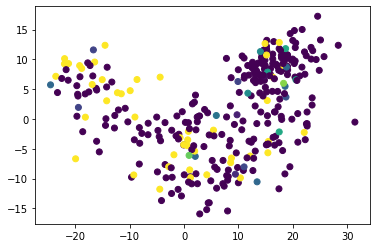

In [27]:
plt.scatter(tiklova_rd.PC_1, tiklova_rd.PC_2, c=tiklova_PSI.loc['Tpm3_2'])

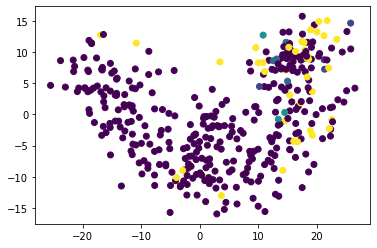

In [11]:
plt.scatter(tiklova_rd.PC_1, tiklova_rd.PC_2, c=tiklova_PSI.loc['Macf1_11'])

In [ ]:
tiklova_psix = pd.read_csv('tiklova_neurogenesis.scores.txt', sep='\t', index_col=0)

In [38]:
list(tiklova_psix.sort_values('L_score')[::-1].index).index('Cadps_7')

29

In [39]:
tiklova_psix.sort_values('L_score')[::-1].iloc[20:40]

,bin,L_score,pvals,qvals,norm_pvals,norm_qvals
Elmo2_2,mean_2_var_5,0.903692,0.000999,0.003769,0.000000e+00,0.000000e+00
Clta_4,mean_3_var_3,0.891267,0.000999,0.003769,0.000000e+00,0.000000e+00
Ablim2_6,mean_2_var_5,0.879314,0.000999,0.003769,0.000000e+00,0.000000e+00
Kif1b_8,mean_2_var_5,0.875900,0.000999,0.003769,0.000000e+00,0.000000e+00
Map4_15,mean_2_var_4,0.845928,0.000999,0.003769,0.000000e+00,0.000000e+00
Rbm3_nmdSE_1,mean_3_var_2,0.844138,0.000999,0.003769,0.000000e+00,0.000000e+00
Camk2g_2,mean_1_var_5,0.840187,0.000999,0.003769,0.000000e+00,0.000000e+00
Ndrg2_2,mean_2_var_5,0.801624,0.000999,0.003769,3.062962e-306,1.645721e-304
Ablim2_4,mean_2_var_4,0.780467,0.000999,0.003769,5.334981e-303,2.791038e-301
Cadps_7,mean_2_var_5,0.777767,0.000999,0.003769,1.053095e-288,5.233880e-287


In [26]:
tiklova_psix.loc[['Rpn2_3', 'Tecr_6']]

,bin,L_score,pvals,qvals,norm_pvals,norm_qvals
Rpn2_3,mean_3_var_2,0.432545,0.000999,0.003769,2.646712e-174,9.071835e-173
Tecr_6,mean_4_var_1,0.218579,0.000999,0.003769,2.552130e-36,3.316101e-35


In [30]:
tiklova_psix.sort_values('L_score')[::-1][:25]

,bin,L_score,pvals,qvals,norm_pvals,norm_qvals
Mapt_1,mean_4_var_4,2.289777,0.000999,0.003769,0.0,0.0
Ndrg4_1,mean_4_var_3,2.067219,0.000999,0.003769,0.0,0.0
Dbn1_1,mean_3_var_3,1.931591,0.000999,0.003769,0.0,0.0
Mapt_3,mean_4_var_1,1.633706,0.000999,0.003769,0.0,0.0
Gabrg2_1,mean_2_var_4,1.573961,0.000999,0.003769,0.0,0.0
Cadm1_10,mean_4_var_2,1.416342,0.000999,0.003769,0.0,0.0
Dst_5,mean_1_var_5,1.383411,0.000999,0.003769,0.0,0.0
Ncam1_6,mean_4_var_2,1.354667,0.000999,0.003769,0.0,0.0
Morf4l2_7,mean_3_var_3,1.230521,0.000999,0.003769,0.0,0.0
Cadm1_3,mean_2_var_5,1.162232,0.000999,0.003769,0.0,0.0


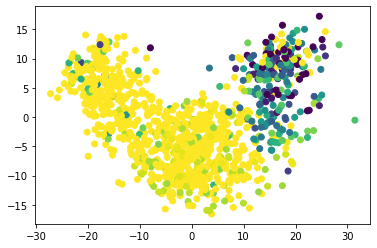

In [21]:
plt.scatter(tiklova_rd.PC_1, tiklova_rd.PC_2, c=tiklova_PSI.loc['Cadm1_10'])

In [18]:
tiklova_PSI.loc['Cacna1c_2'].isna().mean()

0.985797827903091